In [1]:
import pandas as pd 
from IPython.display import display, HTML

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

In [2]:
# Reading in our df 
df = pd.read_pickle("../data/clean/records/cycles/2021-12-27_2022-08-01.csv")

In [3]:
# Filter dates 

# All data after select date
df = df.loc[df['during_start'] > '2022-05-06'] # cjx data 

# Between two dates 
#df = df.loc[df["during_start"].between("2022-05-06", "2022-05-31")]

In [4]:
# View the entire df head for ref 
display(HTML(df.head().to_html()))

,cycle_id,created_at,updated_at,scaled_strain,user_cycle_id,predicted_end,timezone_offset,data_state,day_strain,day_kilojoules,day_avg_heart_rate,day_max_heart_rate,during_start,during_end,days_start,days_end,calories,StrainCategory,day_number,week_number,month_number,year_number
318,224345865,2022-05-07 07:36:56.381,2022-05-08 09:30:21.749,9.884681,3802464,2022-05-08 00:25:54.224,-400,complete,0.003600,10898.746094,63,156,2022-05-06 23:37:21.419,2022-05-08 00:25:54.224,2022-05-07,2022-05-08,2604,light,7,18,5,2022
319,224788831,2022-05-08 09:30:21.534,2022-05-09 08:32:22.183,9.863610,3802464,2022-05-08 22:47:11.594,-400,complete,0.003584,9996.106445,60,183,2022-05-08 00:25:54.224,2022-05-08 22:47:11.594,2022-05-08,2022-05-09,2389,light,8,18,5,2022
320,225168218,2022-05-09 08:32:22.008,2022-05-10 09:04:52.384,7.777183,3802464,2022-05-10 02:12:49.511,-400,complete,0.002157,11579.758789,60,135,2022-05-08 22:47:11.594,2022-05-10 02:12:49.511,2022-05-09,2022-05-10,2767,minimal,9,19,5,2022
321,225582260,2022-05-10 09:04:52.251,2022-05-11 08:52:30.781,13.866643,3802464,2022-05-11 00:20:57.556,-400,complete,0.008497,12409.345703,68,173,2022-05-10 02:12:49.511,2022-05-11 00:20:57.556,2022-05-10,2022-05-11,2965,medium,10,19,5,2022
322,225961980,2022-05-11 08:52:29.533,2022-05-12 06:19:04.107,14.332815,3802464,2022-05-11 23:40:08.185,-400,complete,0.009429,13355.745117,71,144,2022-05-11 00:20:57.556,2022-05-11 23:40:08.185,2022-05-11,2022-05-12,3192,high,11,19,5,2022


### Strain vs Scaled Strain
> strain_vs_scaled() in VisbaleWhoop

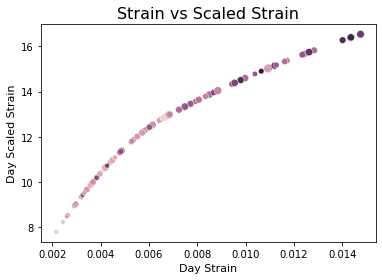

In [5]:
sns.scatterplot(data = df, x = "day_strain", y = "scaled_strain", hue='day_avg_heart_rate', size='day_max_heart_rate', legend = False)


plt.xlabel("Day Strain", size=11)
plt.ylabel("Day Scaled Strain", size=11)
plt.title("Strain vs Scaled Strain", size=16)
plt.show()

### Calories Burned vs Scaled Strain
- calories were converted from kilojoules during cleaning
> cals_vs_strain() in VisbaleWhoop

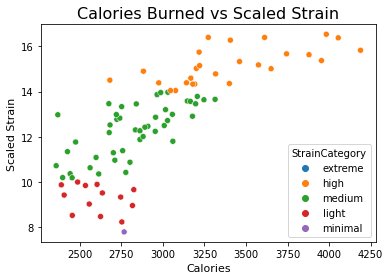

In [6]:
sns.scatterplot(data=df, x="calories", y="scaled_strain", hue="StrainCategory", hue_order = ['extreme', 'high', 'medium', 'light', 'minimal'])

plt.xlabel("Calories", size=11)
plt.ylabel("Scaled Strain", size=11)
plt.title("Calories Burned vs Scaled Strain", size=16)
plt.show()

### Max Heart Rate paired with Average Heart Rate 
> max_avg_hr() in VisbaleWhoop

In [7]:
fig = go.Figure()

fig.add_trace(go.Scatter(
x=df.days_start,
y=df["day_max_heart_rate"],
mode="markers+lines",
name = "Max HR",
text = "Max HR:" + df['days_start'].astype('string') + " - " + df['day_max_heart_rate'].astype('string'),
hoverinfo = 'text'))

fig.add_trace(go.Scatter(
x=df.days_start,
y=df["day_avg_heart_rate"],
mode="markers+lines",
name = "Avg HR",
text = "Avg HR:" + df['days_start'].astype('string') + " - " + df['day_avg_heart_rate'].astype('string'),
hoverinfo = 'text'))

fig.update_xaxes(title='Date')
fig.update_yaxes(title='BPMs')
fig.update_layout(title_text='Max & Average HR per Day', title_x=0.5)


fig.show()

### Scaled Strain per Day
> scaled_strain() in VisbaleWhoop

In [8]:
df['scaled_strain'] = df['scaled_strain'].apply(lambda x: round(x, 2))

fig = px.bar(df, x='days_start', y='scaled_strain',
            labels={'days_start': 'Date', 'scaled_strain':'Scaled Strain'})

fig.update_traces(text = df.scaled_strain, textposition = "outside")
fig.update_layout(title_text='Scaled Strain per Day', title_x=0.5)
fig.show()

### Calories burned per day
- converted from kilojoules during cleaning 
> cals_burned() in VisbaleWhoop

In [9]:
fig = px.bar(df, x='days_start', y='calories',
            labels={'days_start': 'Date', 'calories':'Calories Burned'})

fig.update_traces(text = df.calories, textposition = "outside")
fig.update_layout(title_text='Calories Burned per Day', title_x=0.5)
fig.show()